In [1]:
import pandas as pd

In [2]:
df=pd.read_parquet(r"C:\Users\beher\jupyterZ\Amex_credit\cleaned.parquet")

In [3]:
X=df[['B_9', 'D_75', 'D_58', 'B_7', 'B_23', 'B_4', 'B_1', 'B_11', 'R_1',
       'R_3', 'R_2', 'P_4', 'R_10', 'B_28', 'R_4', 'S_15', 'D_39', 'R_5',
       'R_8']]
y=df['target']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.98, shuffle=True, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5,shuffle=True,random_state=100)

In [9]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded in X_train, y_train, X_test, and y_test

# Initialize the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, max_depth=15, learning_rate=0.01, subsample=0.6, colsample_bytree=0.8)

# Train the model on the training data
lgb_classifier.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4070410, number of negative: 4070536
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.724329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 8140946, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=15,
               subsample=0.6)

In [10]:
# Calculate details
print('LightGBM Classifier Train Score is:', lgb_classifier.score(X_train, y_train))
print('LightGBM Classifier Test Score is:', lgb_classifier.score(X_test, y_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Classifier Train Score is: 0.8288488831641925
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Classifier Test Score is: 0.8307833058468057


In [11]:
# Cross-validation
CrossValidateValues4 = cross_validate(lgb_classifier, X_val, y_val, cv=5, return_train_score=True)

# Showing Results
print('Train Score Value:', CrossValidateValues4['train_score'])
print('Test Score Value:', CrossValidateValues4['test_score'])
print('Fit Time:', CrossValidateValues4['fit_time'])
print('Score Time:', CrossValidateValues4['score_time'])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 33334, number of negative: 33122
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 66456, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501595 -> initscore=0.006380
[LightGBM] [Info] Start training from score 0.006380
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (n

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


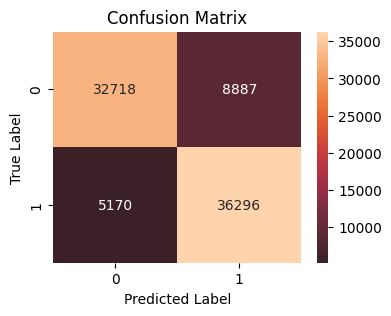

Confusion Matrix is
 [[32718  8887]
 [ 5170 36296]]


In [12]:
# Predict on the test set
y_pred_lgb = lgb_classifier.predict(X_test)

# Confusion Matrix
CM_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(CM_lgb, center=True, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print('Confusion Matrix is\n', CM_lgb)

# Tuning


In [13]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded in X_train, y_train, X_test, and y_test

# Initialize the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize RandomizedSearchCV with the LightGBM Classifier and hyperparameter grid
random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform the random search for hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model from the random search
best_params = random_search.best_params_
best_lgb_classifier = random_search.best_estimator_

# Print the best parameters and train/test scores
print('Best Hyperparameters:', best_params)
print('Best Train Score:', best_lgb_classifier.score(X_train, y_train))
print('Best Test Score:', best_lgb_classifier.score(X_test, y_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256428
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.484867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512756, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256429
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.507535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512757, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.736360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512757, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256429
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.956429 seconds.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256429
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.288959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512757, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad si

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256429
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.695395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512757, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3256328, number of negative: 3256429
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.432613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6512757, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
y_probs = best_lgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_probs)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Squared Error: 0.11416548621828866
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [17]:
y_probs

array([0.49345365, 0.01675468, 0.24981508, ..., 0.02050006, 0.95587156,
       0.51141851])

In [19]:
import numpy as np

In [20]:
data = {"prediction":np.array(y_probs), "target": np.array(y_test)}  
df_gini=pd.DataFrame(data)

In [21]:
df_gini

,prediction,target
0,0.493454,1
1,0.016755,0
2,0.249815,0
3,0.627894,1
4,0.972453,1
...,...,...
83066,0.810095,1
83067,0.813091,1
83068,0.020500,0
83069,0.955872,1


In [22]:
df = (pd.concat([df_gini["target"], df_gini["prediction"]], axis='columns').sort_values('prediction', ascending=False))
df

,target,prediction
19985,1,0.997405
4328,1,0.997249
23064,1,0.997154
50370,1,0.997139
54343,1,0.997098
...,...,...
70169,0,0.004421
72608,0,0.004309
38569,0,0.004278
58541,0,0.004251


In [23]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        
        # Instead of going through the population from poorest to richest, we go through our predictions from lowest to highest.?? (other way round)
        # Sort the actual values by the predictions
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        
        # We assign the weight to the majority class (0) that we subsample
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        
        # Sum up the targets
        total_pos = (df['target'] * df['weight']).sum()
        
         # Instead of summing up the income, we sum up the actual values of our predictions:
        # Sum up the actual values
        # This corresponds to the Lorenz Curve
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [24]:
amex_metric(df[['target']], df[['prediction']])

0.6006170739766306